# Assignment-03-Q3 (Hypothesis Testing)

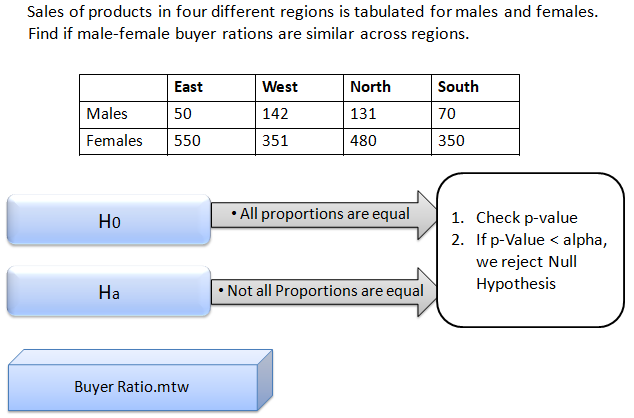

In [7]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data=pd.read_csv('C:/Users/Payod/Downloads/BuyerRatio.csv',index_col = 0)
data

,North,South,East,West
Observed Values,,,,
Males,131,70,50,142
Females,1356,750,435,1523


In [9]:
obs= [[131,70,50,142],
        [1356,750,435,1523]]
obs

[[131, 70, 50, 142], [1356, 750, 435, 1523]]

# PLOTTING DATA

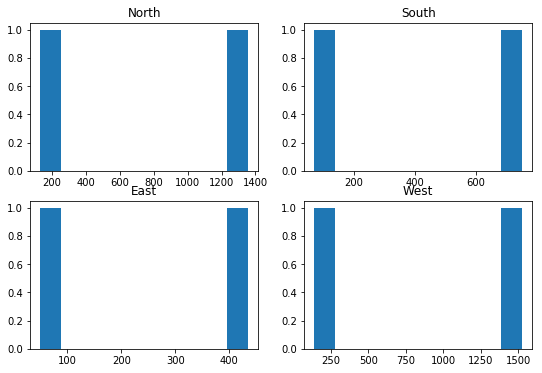

In [10]:
plt.subplots(figsize = (9,6))
plt.subplot(221)
plt.hist(data['North'])
plt.title('North')
plt.subplot(222)
plt.hist(data['South'])
plt.title('South')
plt.subplot(223)
plt.hist(data['East'])
plt.title('East')
plt.subplot(224)
plt.hist(data['West'])
plt.title('West')
plt.show()

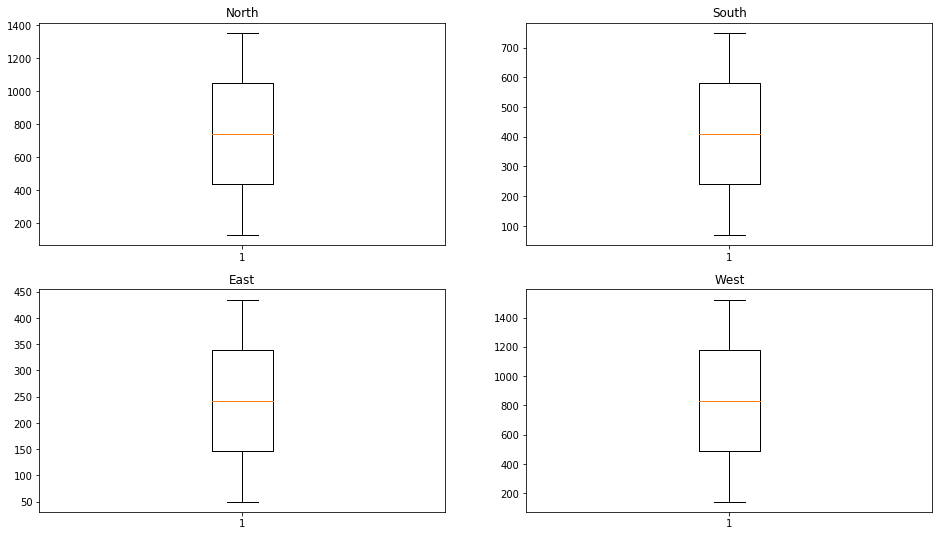

In [12]:
plt.subplots(figsize = (16,9))
plt.subplot(221)
plt.boxplot(data['North'])
plt.title('North')
plt.subplot(222)
plt.boxplot(data['South'])
plt.title('South')
plt.subplot(223)
plt.boxplot(data['East'])
plt.title('East')
plt.subplot(224)
plt.boxplot(data['West'])
plt.title('West')
plt.show()

C:\Users\Payod\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


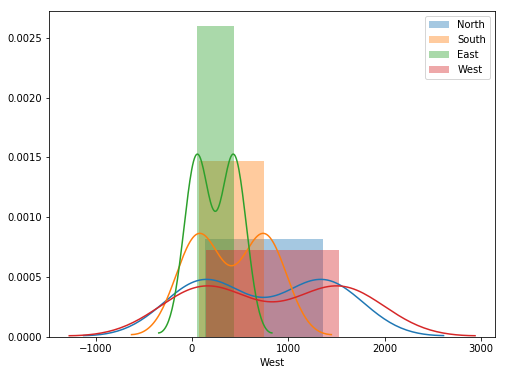

In [42]:
plt.figure(figsize = (8,6))
labels = ['North', 'South','East', 'West']
sns.distplot(data['North'], kde = True)
sns.distplot(data['South'],hist = True)
sns.distplot(data['East'],hist = True)
sns.distplot(data['West'],hist = True)
plt.legend(labels)

# Transformations

Text(0.5, 1.0, 'Cube Root')

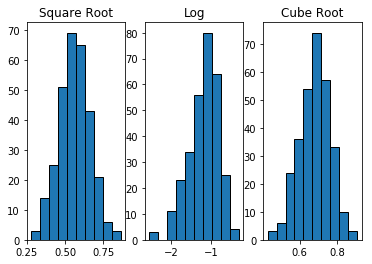

In [16]:
data_log = np.log(data)
data_log1 = np.sqrt(data)
data_log2 = np.cbrt(data)
fig, axs = plt.subplots(nrows=1, ncols=3)
axs[0].hist(data_log1, edgecolor='black')
axs[0].set_title('Square Root')
axs[1].hist(data_log, edgecolor='black')
axs[1].set_title('Log')
axs[2].hist(data_log2, edgecolor='black')
axs[2].set_title('Cube Root')

# Converting observed value into expected value using Chi-Square contingency table

In [19]:
stat, p, dof, exp = stats.chi2_contingency(data) 
print(stat,"\n", p,"\n", dof,"\n", exp)

1.595945538661058 
 0.6603094907091882 
 3 
 [[  42.76531299  146.81287862  131.11756787   72.30424052]
 [ 442.23468701 1518.18712138 1355.88243213  747.69575948]]


In [21]:
stats.chi2_contingency(data) 

(1.595945538661058,
 0.6603094907091882,
 3,
 array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
        [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]]))

In [22]:
observed = np.array([50, 142, 131, 70, 435, 1523, 1356, 750])
expected = np.array([42.76531299,  146.81287862,  131.11756787, 72.30424052, 442.23468701, 1518.18712138, 1355.88243213, 747.69575948])

# HYPOTHESIS TESTING FROM ABOVE INCIDENCES USING T-STATISTICS

In [23]:
statistics, p_value = stats.chisquare(observed, expected, ddof = 3)
print("Statistics = ",statistics,"\n",'P_Value = ', p_value)

Statistics =  1.5959455390914483 
 P_Value =  0.8095206646905712


BY COMPARING p_value with Alpha (SIGNIFICANCE LEVEL)
CHECKING NULl HYPOTHESIS 
p_value not equal to alpha, then failed to reject Null Hypothesis due to no evidenece
p_value equal to alpha, then Null Hypothesis Succesfully rejected

In [ ]:
Since ALPHA is 5%=1-0.95=0.05 (One Tail)

In [24]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.050, p=0.810
We fail to reject Null hypothesis
